In [393]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Data Processing

In [2]:
data = pd.read_csv("~/Downloads/auto-mpg.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [33]:
data.size

3582

In [35]:
data.shape

(398, 9)

In [4]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [9]:
print(data['origin'].unique())
print(data['cylinders'].unique())

[1 3 2]
[8 4 6 3 5]


In [16]:
data1 = data[['mpg','cylinders','displacement','horsepower','weight','acceleration']]

In [27]:
data1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
dtype: int64

# Check Hypothesis for the above data1

In [17]:
data1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration'],
      dtype='object')

In [18]:
len(data1)

398

In [19]:
data1.shape

(398, 6)

In [22]:
#ANOVA
from scipy import stats

In [43]:
c,p = stats.f_oneway(data['mpg'],data['cylinders'],data['displacement'],data['horsepower'],data['weight'],data['acceleration'])

In [44]:
print(p)

0.0


In [45]:
print(c)

4611.099979662287


In [31]:
x1_mean = np.mean(data1['mpg'])
x2_mean = np.mean(data1['cylinders'])
x3_mean = np.mean(data1['displacement'])
x4_mean = np.mean(data1['horsepower'])
x5_mean = np.mean(data1['weight'])
x6_mean = np.mean(data1['acceleration'])

In [111]:
sum_mean = x1_mean + x2_mean + x3_mean + x4_mean + x5_mean + x6_mean

In [112]:
sum_mean = sum_mean / 6

In [113]:
sum_mean

551.9381909547739

In [51]:
n1 = len(data1['mpg'])
n2 = len(data1['cylinders'])
n3 = len(data1['displacement'])
n4 = len(data1['horsepower'])
n5 = len(data1['weight'])
n6 = len(data1['acceleration'])
print(n1)
print(n2)
print(n3)
print(n4)
print(n5)
print(n6)

398
398
398
398
398
398


In [52]:
N = n1+n2+n3+n4+n5+n6
print(N)

2388


In [53]:
k = len(data1.columns)
print(k)

6


In [59]:
x1_sum = np.sum((data['mpg'] - x1_mean) ** 2)
print(x1_sum)

24252.575477386934


In [61]:
x2_sum = np.sum((data['cylinders'] - x2_mean) ** 2)
print(x2_sum)

1148.6859296482412


In [62]:
x3_sum = np.sum((data['displacement'] - x3_mean) ** 2)
print(x3_sum)

4316263.063442212


In [63]:
x4_sum = np.sum((data['horsepower'] - x4_mean) ** 2)
print(x4_sum)

618516.8442211056


In [64]:
x5_sum = np.sum((data['weight'] - x5_mean) ** 2)
print(x5_sum)

284704973.2386935


In [67]:
x6_sum = np.sum((data['acceleration'] - x6_mean) ** 2)
print(x6_sum)

3019.1247487437186


In [109]:
x_sum = x1_sum + x2_sum + x3_sum + x4_sum + x5_sum + x6_sum 

In [110]:
x_sum

289668173.5325126

In [114]:
x1_sum1 = n1 * ((x1_mean - sum_mean) ** 2)
print(x1_sum1)

111134145.02201004


In [115]:
x2_sum2 = n2 * ((x2_mean - sum_mean) ** 2)
print(x2_sum2)

118860361.80944724


In [116]:
x3_sum3 = n3 * ((x3_mean - sum_mean) ** 2)
print(x3_sum3)

51155368.86032664


In [117]:
x4_sum4 = n4 * ((x4_mean - sum_mean) ** 2)
print(x4_sum4)

80128935.74361809


In [118]:
x5_sum5 = n5 * ((x5_mean - sum_mean) ** 2)
print(x5_sum5)

2327932495.773267


In [119]:
x6_sum6 = n6 * ((x6_mean - sum_mean) ** 2)
print(x6_sum6)

114501768.11580399


In [120]:
total_sum = x1_sum1 + x2_sum2 + x3_sum3 + x4_sum4 + x5_sum5 + x6_sum6

In [121]:
print(total_sum)

2803713075.324473


In [122]:
mssb = total_sum / (k-1)
print(mssb)

560742615.0648946


In [123]:
f = mssb/mssw

In [124]:
f

4611.099979662281

In [125]:
f_critical = 5000

In [127]:
if(f<f_critical):
    print("Null Hypothesis is accepeted")
else:
    print("Null Hypothesis is not accepted")

Null Hypothesis is accepeted


# Plot the graphs to understand the data more better

In [172]:
data1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5


In [135]:
data1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,103.241206,2970.424623,15.568090
std,7.815984,1.701004,104.269838,39.471217,846.841774,2.757689
min,9.000000,3.000000,68.000000,23.000000,1613.000000,8.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


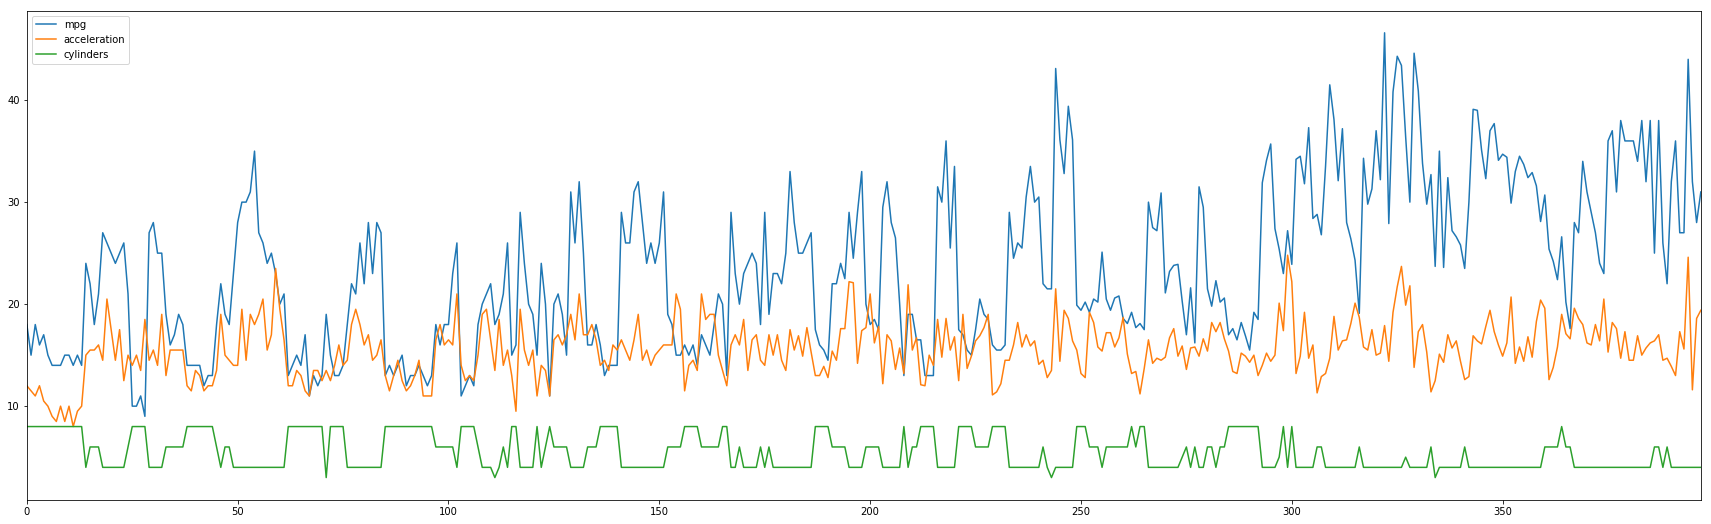

In [319]:
plt.figure(figsize=(30,9))
data['mpg'].plot()
data['acceleration'].plot()
data['cylinders'].plot()
plt.legend()
plt.show()

In [183]:
len(data['origin'])

398

In [178]:
count_origin1 = 0
for i in range(len(data['origin'])):
    if data['origin'].loc[i]==1:
        count_origin1 = count_origin1 + 1 
print(count_origin1)

249


In [181]:
count_origin2 = 0
for i in range(len(data['origin'])):
    if(data['origin'].loc[i]==2):
        count_origin2 = count_origin2 + 1
print(count_origin2)

70


In [182]:
count_origin3 = 0
for i in range(len(data['origin'])):
    if data['origin'].loc[i]==3:
        count_origin3 = count_origin3 + 1
print(count_origin3)

79


In [188]:
percent_origin1 = (count_origin1/len(data['origin']))*100

62.562814070351756


In [193]:
percent_origin1

62.562814070351756

In [189]:
percent_origin2 = (count_origin2/len(data['origin']))*100

In [190]:
percent_origin2

17.587939698492463

In [191]:
percent_origin3 = (count_origin3/len(data['origin']))*100

In [192]:
percent_origin3

19.849246231155778

In [200]:
percentage = np.array([percent_origin1,percent_origin3,percent_origin2])

In [201]:
percentage

array([62.56281407, 19.84924623, 17.5879397 ])

In [202]:
origin_name = data['origin'].unique()

In [233]:
origin_name

array([1, 3, 2])

In [235]:
origin_name_0 = origin_name[0]

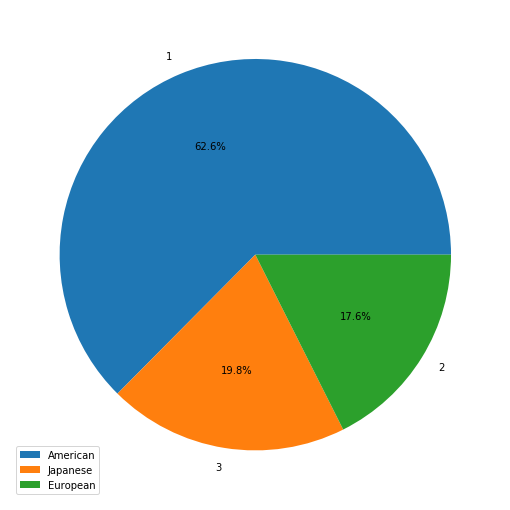

In [250]:
plt.figure(figsize=(16,9))
plt.pie(percentage,labels=origin_name,autopct='%.1f%%')
plt.legend(['American','Japanese','European'])
plt.show()

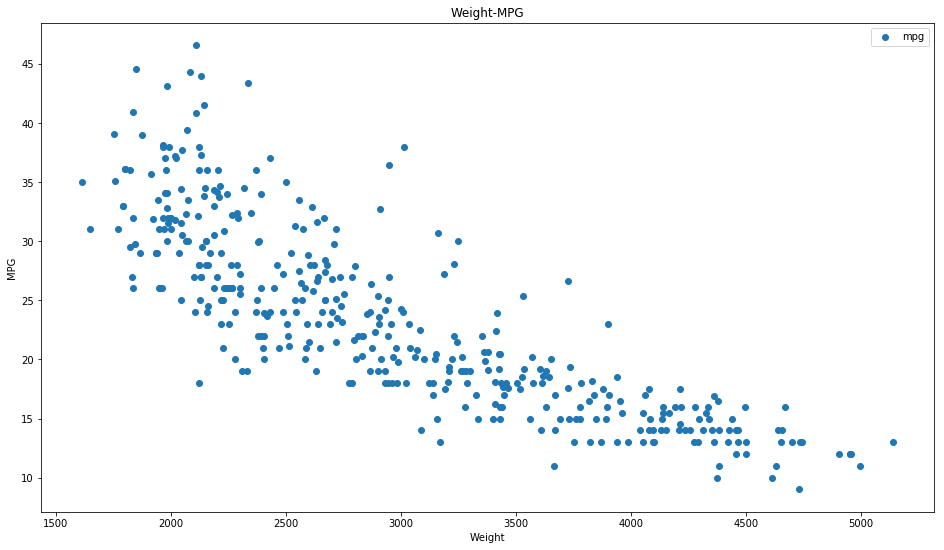

In [464]:
plt.figure(figsize=(16,9))
plt.title("Weight-MPG")
plt.scatter(data['weight'],data['mpg'])
plt.xlabel("Weight")
plt.ylabel('MPG')
plt.legend()
plt.show()

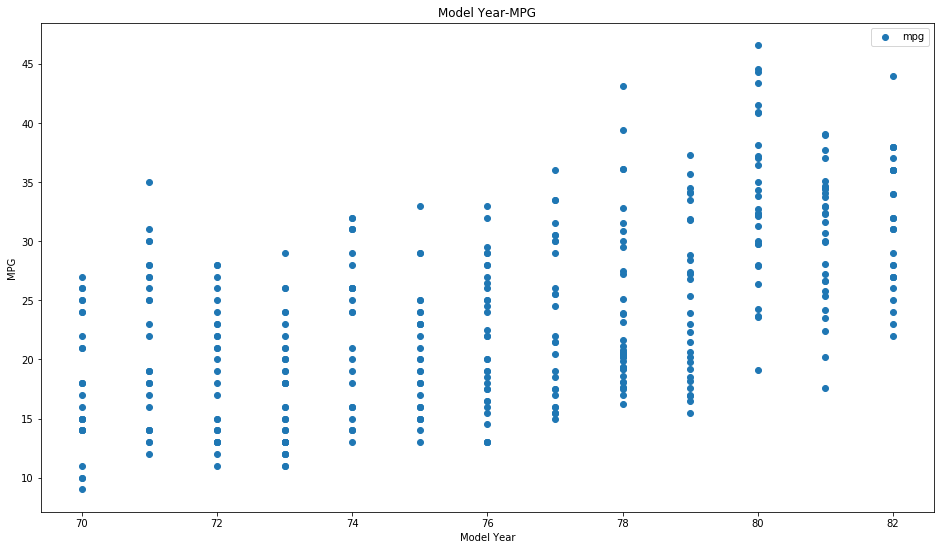

In [300]:
plt.figure(figsize=(16,9))
plt.title("Model Year-MPG")
plt.scatter(data['model year'],data['mpg'])
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.legend()
plt.show()

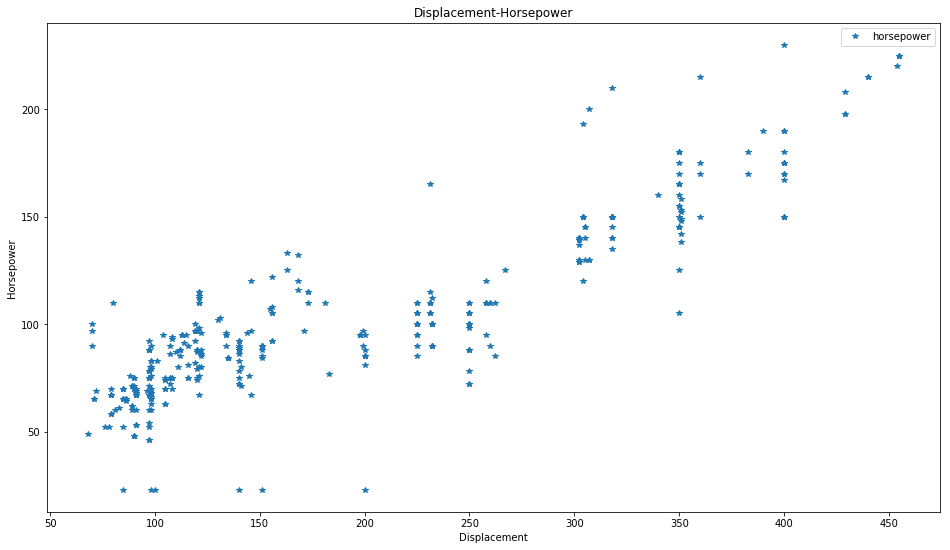

In [295]:
plt.figure(figsize=(16,9))
plt.plot(data['displacement'],data['horsepower'],'*')
plt.title("Displacement-Horsepower")
plt.xlabel('Displacement')
plt.ylabel('Horsepower')
plt.legend()
plt.show()

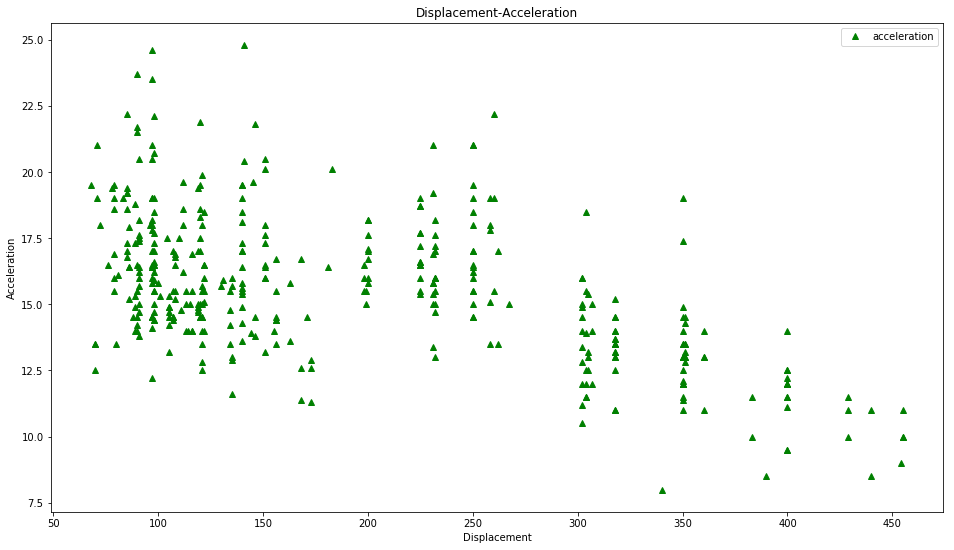

In [297]:
plt.figure(figsize=(16,9))
plt.plot(data['displacement'],data['acceleration'],'^',color='green')
plt.title("Displacement-Acceleration")
plt.xlabel('Displacement')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

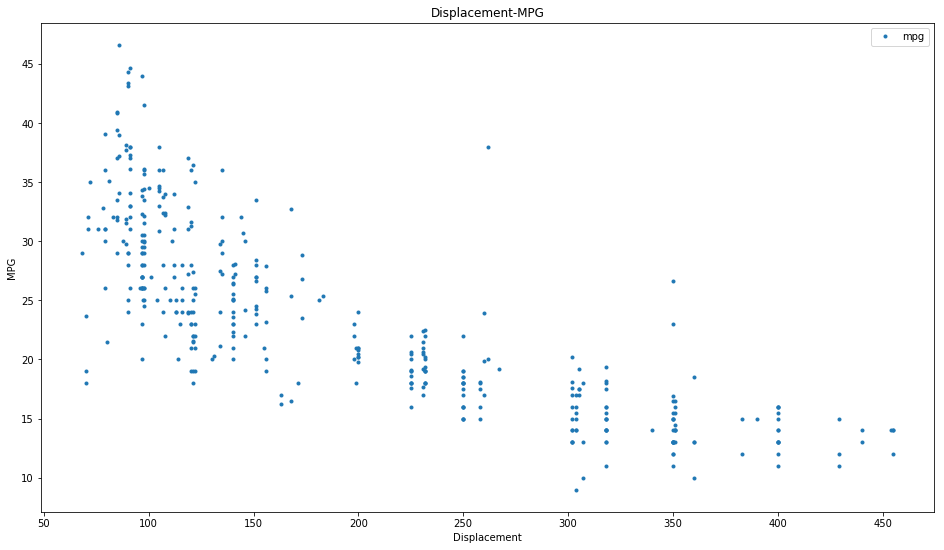

In [412]:
plt.figure(figsize=(16,9))
plt.plot(data['displacement'],data['mpg'],'.')
plt.title('Displacement-MPG')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.legend()
plt.show()

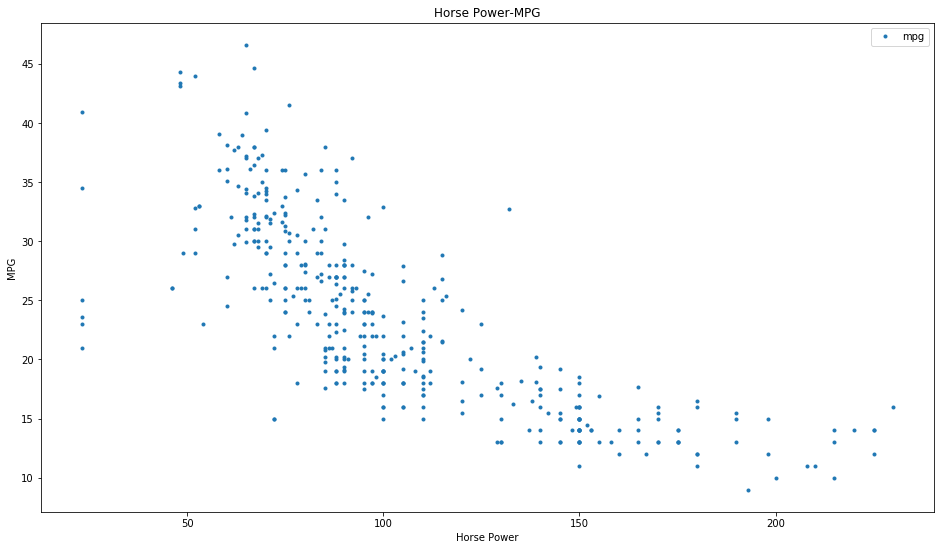

In [493]:
plt.figure(figsize=(16,9))
plt.plot(data['horsepower'],data['mpg'],'.')
plt.title('Horse Power-MPG')
plt.xlabel('Horse Power')
plt.ylabel('MPG')
plt.legend()
plt.show()

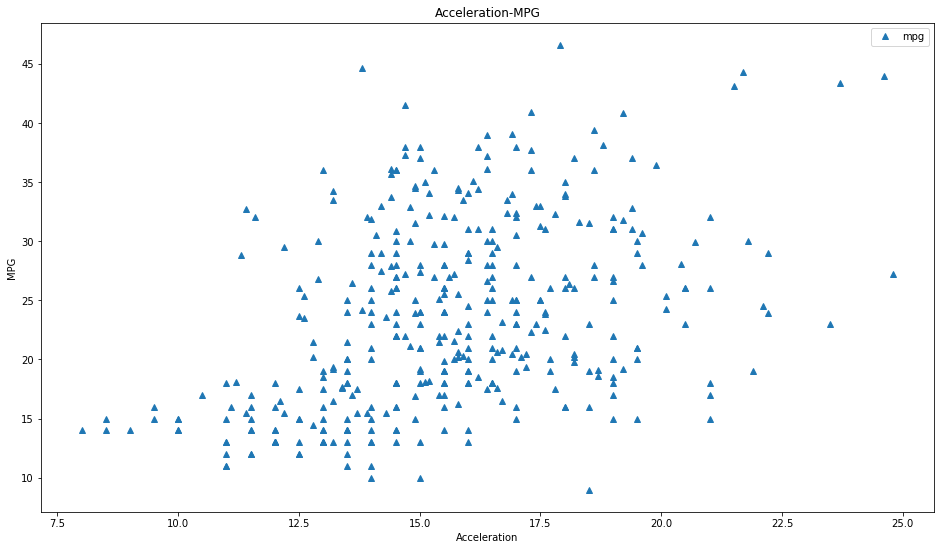

In [495]:
plt.figure(figsize=(16,9))
plt.plot(data1['acceleration'],data1['mpg'],'^')
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.title('Acceleration-MPG')
plt.legend()
plt.show()

In [332]:
data1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration'],
      dtype='object')

In [578]:
X=data1[['cylinders','displacement','horsepower','weight']]

In [579]:
y=data1[['mpg']]

In [580]:
from sklearn.model_selection import train_test_split

In [581]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [582]:
len(X_test)

100

In [583]:
len(y_test)

100

# Build the model

In [584]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [585]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report

In [586]:
linear_regression = LinearRegression()

In [587]:
linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [588]:
y_pred_lir = linear_regression.predict(X_test)
y_pred_lir1 = linear_regression.predict(X_train)

In [589]:
y_pred_lir[:10]

array([[23.57598095],
       [23.23481991],
       [16.93776837],
       [24.58957507],
       [21.9868264 ],
       [13.09628522],
       [32.30777269],
       [30.75285317],
       [16.36469758],
       [11.12680616]])

In [590]:
y_test[:10]

,mpg
174,18.0
359,28.1
250,19.4
274,20.3
283,20.2
232,16.0
117,29.0
348,37.7
189,15.5
106,12.0


In [591]:
print(r2_score(y_pred_lir1,y_train))

0.5465402585669593


In [592]:
print(r2_score(y_pred_lir,y_test))

0.7177262896311727


In [593]:
print(mean_squared_error(y_pred_lir,y_test))

13.049323126714782


In [594]:
print(math.sqrt(mean_squared_error(y_pred_lir,y_test)))

3.612384686978227


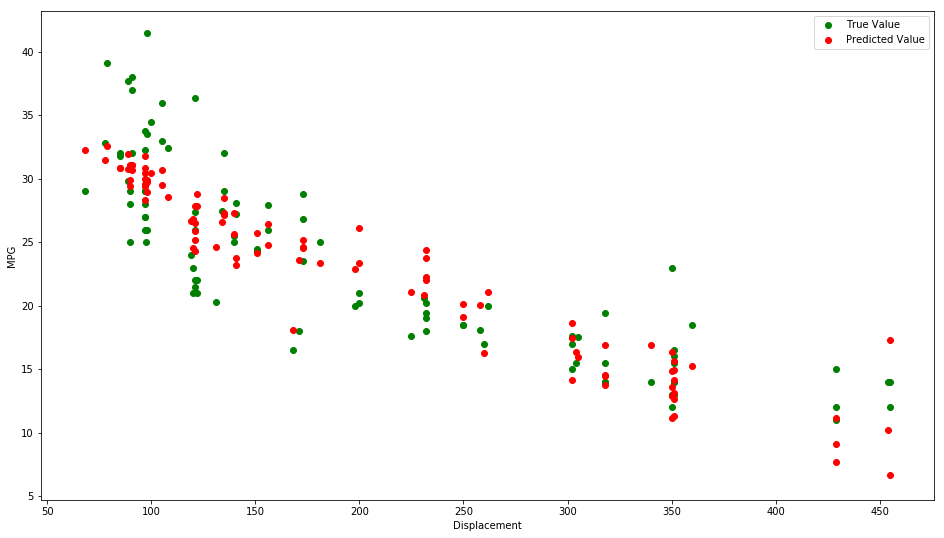

In [595]:
plt.figure(figsize=(16,9))
plt.scatter(X_test['displacement'],y_test,color='green')
plt.scatter(X_test['displacement'],y_pred_lir,color='red')
plt.ylabel('MPG')
plt.xlabel('Displacement')
plt.legend(('True Value','Predicted Value'))
plt.show()

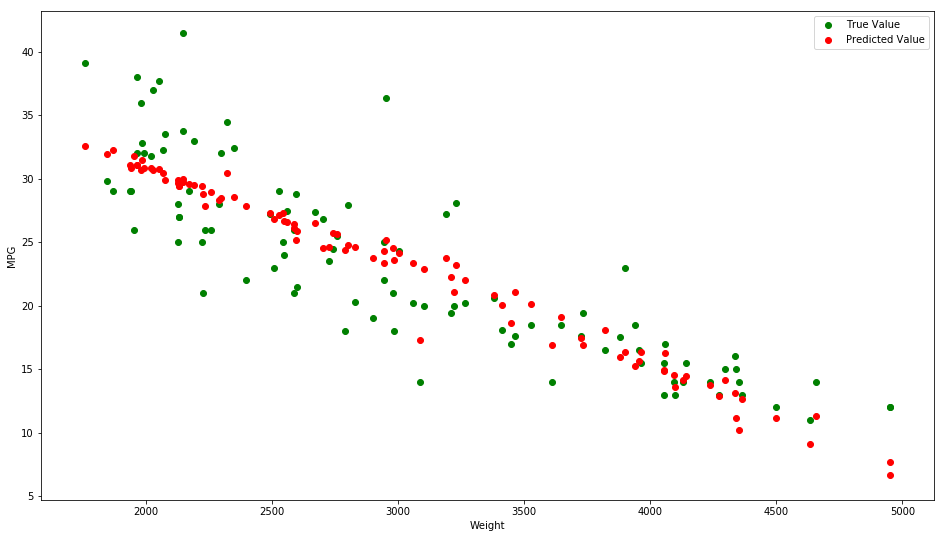

In [596]:
plt.figure(figsize=(16,9))
plt.scatter(X_test['weight'],y_test,color='green')
plt.scatter(X_test['weight'],y_pred_lir,color='red')
plt.ylabel('MPG')
plt.xlabel('Weight')
plt.legend(('True Value','Predicted Value'))
plt.show()

In [597]:
decisiontree = DecisionTreeRegressor()

In [598]:
decisiontree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [599]:
y_pred_tree = decisiontree.predict(X_test)

In [600]:
y_pred_tree[:10]

array([23. , 22.3, 18.2, 21.6, 18. , 14.5, 43.1, 38.1, 17. , 13. ])

In [601]:
print(r2_score(y_pred_tree,y_test))

0.6141686734065872


In [602]:
print(mean_squared_error(y_pred_tree,y_test))

23.2535


In [603]:
print(math.sqrt(mean_squared_error(y_pred_tree,y_test)))

4.822188299931889


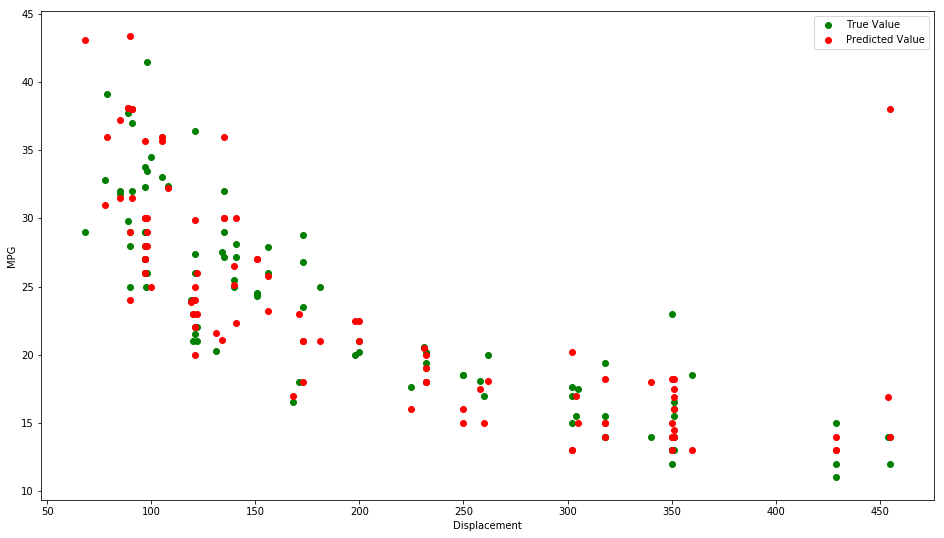

In [604]:
plt.figure(figsize=(16,9))
plt.scatter(X_test['displacement'],y_test,color='green')
plt.scatter(X_test['displacement'],y_pred_tree,color='red')
plt.ylabel('MPG')
plt.xlabel('Displacement')
plt.legend(('True Value','Predicted Value'))
plt.show()

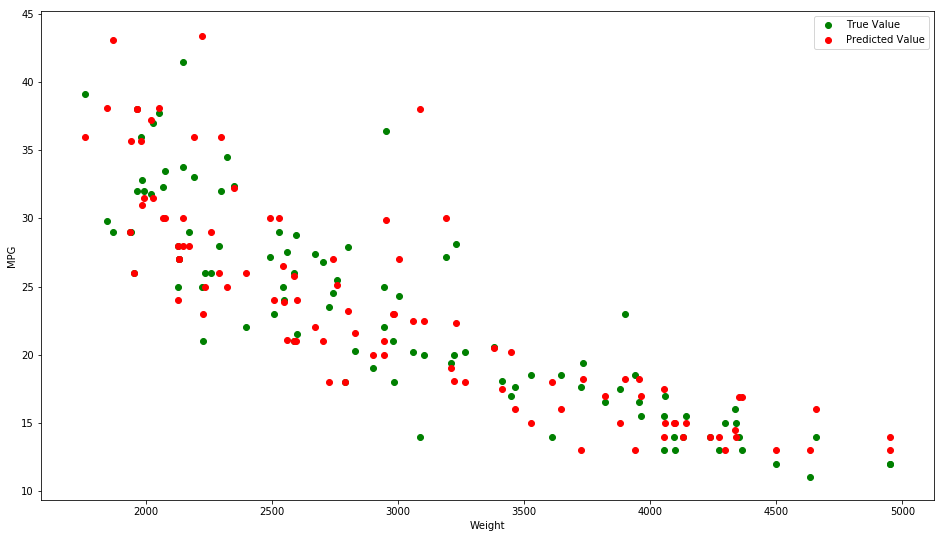

In [605]:
plt.figure(figsize=(16,9))
plt.scatter(X_test['weight'],y_test,color='green')
plt.scatter(X_test['weight'],y_pred_tree,color='red')
plt.ylabel('MPG')
plt.xlabel('Weight')
plt.legend(('True Value','Predicted Value'))
plt.show()

In [606]:
randomforest = RandomForestRegressor()

In [607]:
randomforest.fit(X_train,y_train)

/Users/syedshakeeb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/syedshakeeb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [608]:
y_pred_random = randomforest.predict(X_test)

In [609]:
y_pred_random1 = randomforest.predict(X_train)

In [610]:
print(r2_score(y_pred_random,y_test))

0.7814885640493545


In [611]:
print(r2_score(y_pred_random1,y_train))

0.938460736366587


In [612]:
print(mean_squared_error(y_pred_random,y_test))

10.395665000000001


In [613]:
print(math.sqrt(mean_squared_error(y_pred_random,y_test)))

3.2242309160480427


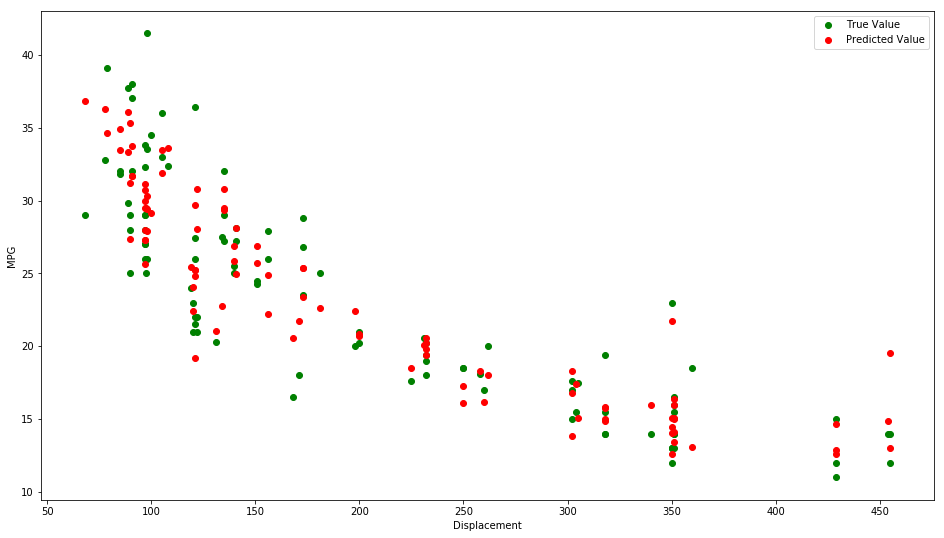

In [614]:
plt.figure(figsize=(16,9))
plt.scatter(X_test['displacement'],y_test,color='green')
plt.scatter(X_test['displacement'],y_pred_random,color='red')
plt.ylabel('MPG')
plt.xlabel('Displacement')
plt.legend(('True Value','Predicted Value'))
plt.show()

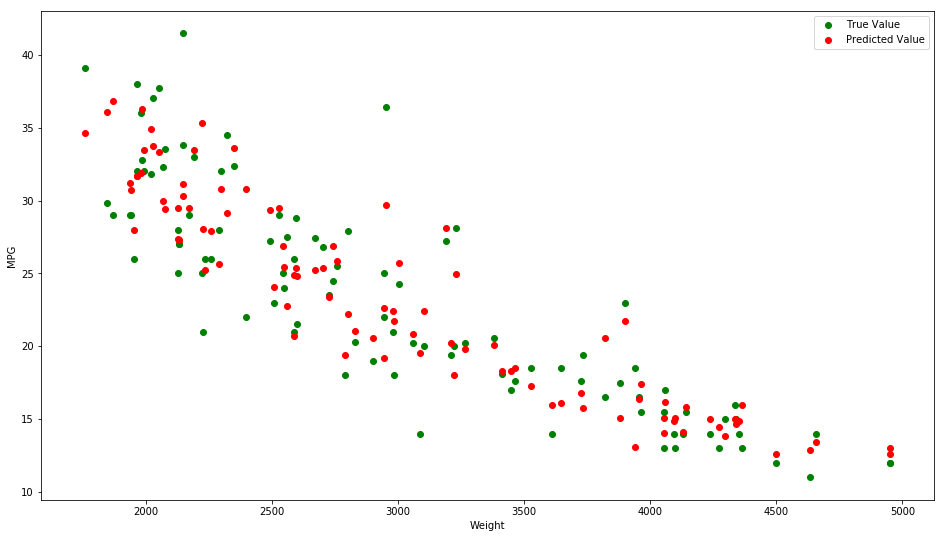

In [615]:
plt.figure(figsize=(16,9))
plt.scatter(X_test['weight'],y_test,color='green')
plt.scatter(X_test['weight'],y_pred_random,color='red')
plt.ylabel('MPG')
plt.xlabel('Weight')
plt.legend(('True Value','Predicted Value'))
plt.show()

In [668]:
weight = input("Please enter the Weight")
displacement = input("Please enter the Displacement")
horsepower = input("Please enter the Horsepower")
cylinders = input("Please enter the cylinders")

Please enter the Weight 3186
Please enter the Displacement 223
Please enter the Horsepower 220
Please enter the cylinders 8


In [669]:
#data1[['cylinders','displacement','horsepower','weight']]
test_data = pd.DataFrame([[cylinders,displacement,horsepower,weight]],columns=('cylinders','displacement','horsepower','weight'))

In [670]:
test_data

,cylinders,displacement,horsepower,weight
0,8,223,220,3186


In [671]:
y_pred = randomforest.predict(test_data)

In [672]:
pd.DataFrame(y_pred,columns=['mpg'])

,mpg
0,16.11


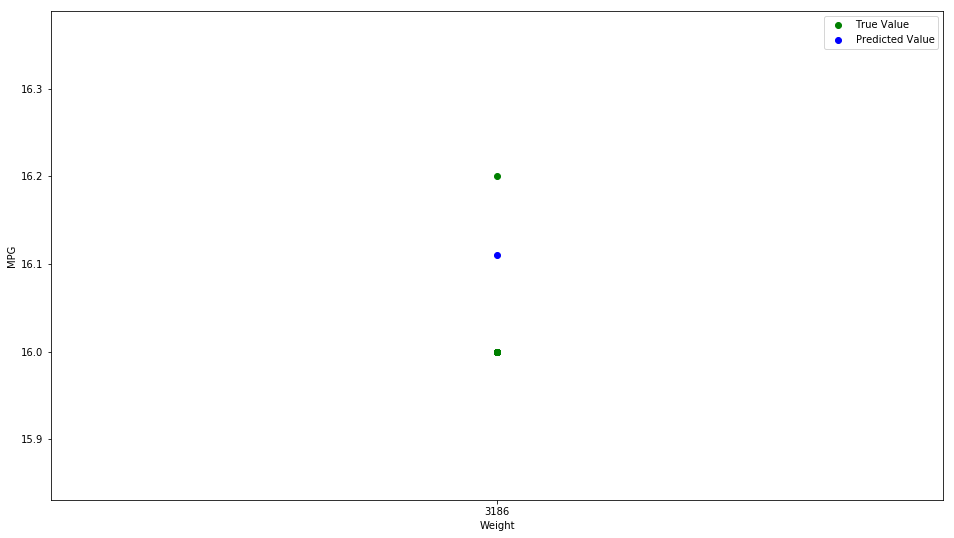

In [674]:
plt.figure(figsize=(16,9))
plt.scatter(X['weight']==weight,y,color='green')
plt.scatter(test_data['weight'],y_pred,color='blue')
plt.ylabel("MPG")
plt.xlabel("Weight")
plt.legend(('True Value','Predicted Value'))
plt.show()

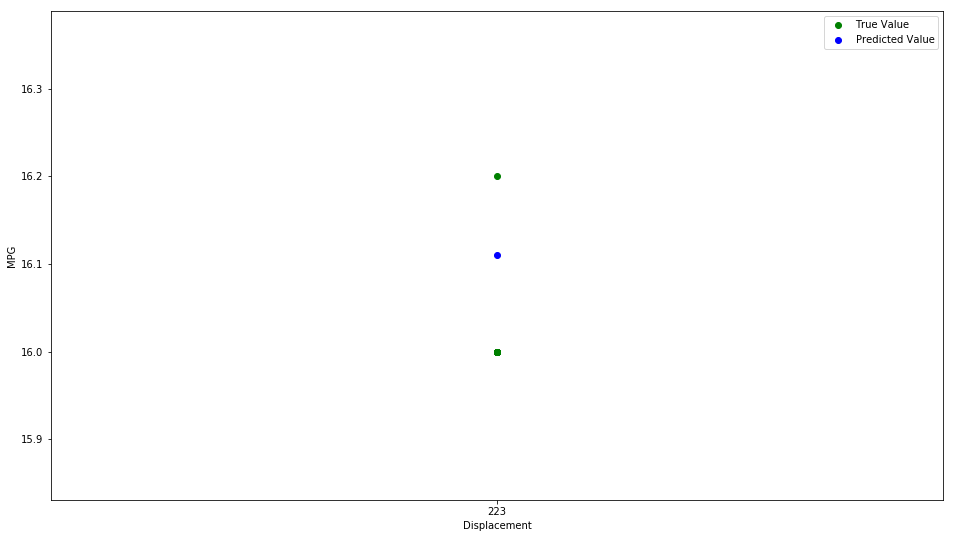

In [675]:
plt.figure(figsize=(16,9))
plt.scatter(X['displacement']==displacement,y,color='green')
plt.scatter(test_data['displacement'],y_pred,color='blue')
plt.ylabel("MPG")
plt.xlabel("Displacement")
plt.legend(('True Value','Predicted Value'))
plt.show()